# Life Expectancy Explratory Data Analysis (EDA)

## Importing packages

In [119]:
# Pandas
import pandas as pd

# Numpy
import numpy as np
import csv

# Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# scipy and statsmodels
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm

## Load and inspect dataset

In [24]:
# Load data from CSV file
df = pd.read_csv('Life Expectancy Data.csv')

# Inspect and describe the data
print(f"The shape of the dataset is: \n", df.shape)
print(f"Information about dataset: \n", df.info)

The shape of the dataset is: 
 (2938, 22)
Information about dataset: 
 <bound method DataFrame.info of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      in

In [25]:
print(f"The first few columns are: \n", df.head())

The first few columns are: 
        Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS      

In [26]:
print(f"Dataset description: \n", df.describe())

Dataset description: 
               Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000              

## Data Cleaning

### Checking and resolving missing values

In [28]:
# Check for missing values
total_missing = df.isnull().sum().sum()
print(f"\n Total Missing Values: {total_missing}")

# Drop rows with any missing values
df= df.dropna()
total_missing_after_removal = df.isnull().sum().sum()
print(f"\n Total Missing Values: {total_missing_after_removal}")


 Total Missing Values: 0

 Total Missing Values: 0


### Checking and fixing duplicated values and column names

In [29]:
# Check for duplicate rows
duplicates= df.duplicated().sum()
print("\nTotal Duplicates:\n",duplicates)

# Format the column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Show the cleaned column names
df.columns.tolist()


Total Duplicates:
 0


['Country',
 'Year',
 'Status',
 'Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under-five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'Income_composition_of_resources',
 'Schooling']

### Save cleaned dataset to another file (.csv)

In [ ]:
# Save the cleaned dataset
df.to_csv('life_expectancy_data_cleaned.csv', index=False)

(1649, 22)

## Exploratory Data Analysis (EDA)

### Box Plots of all Numeric data

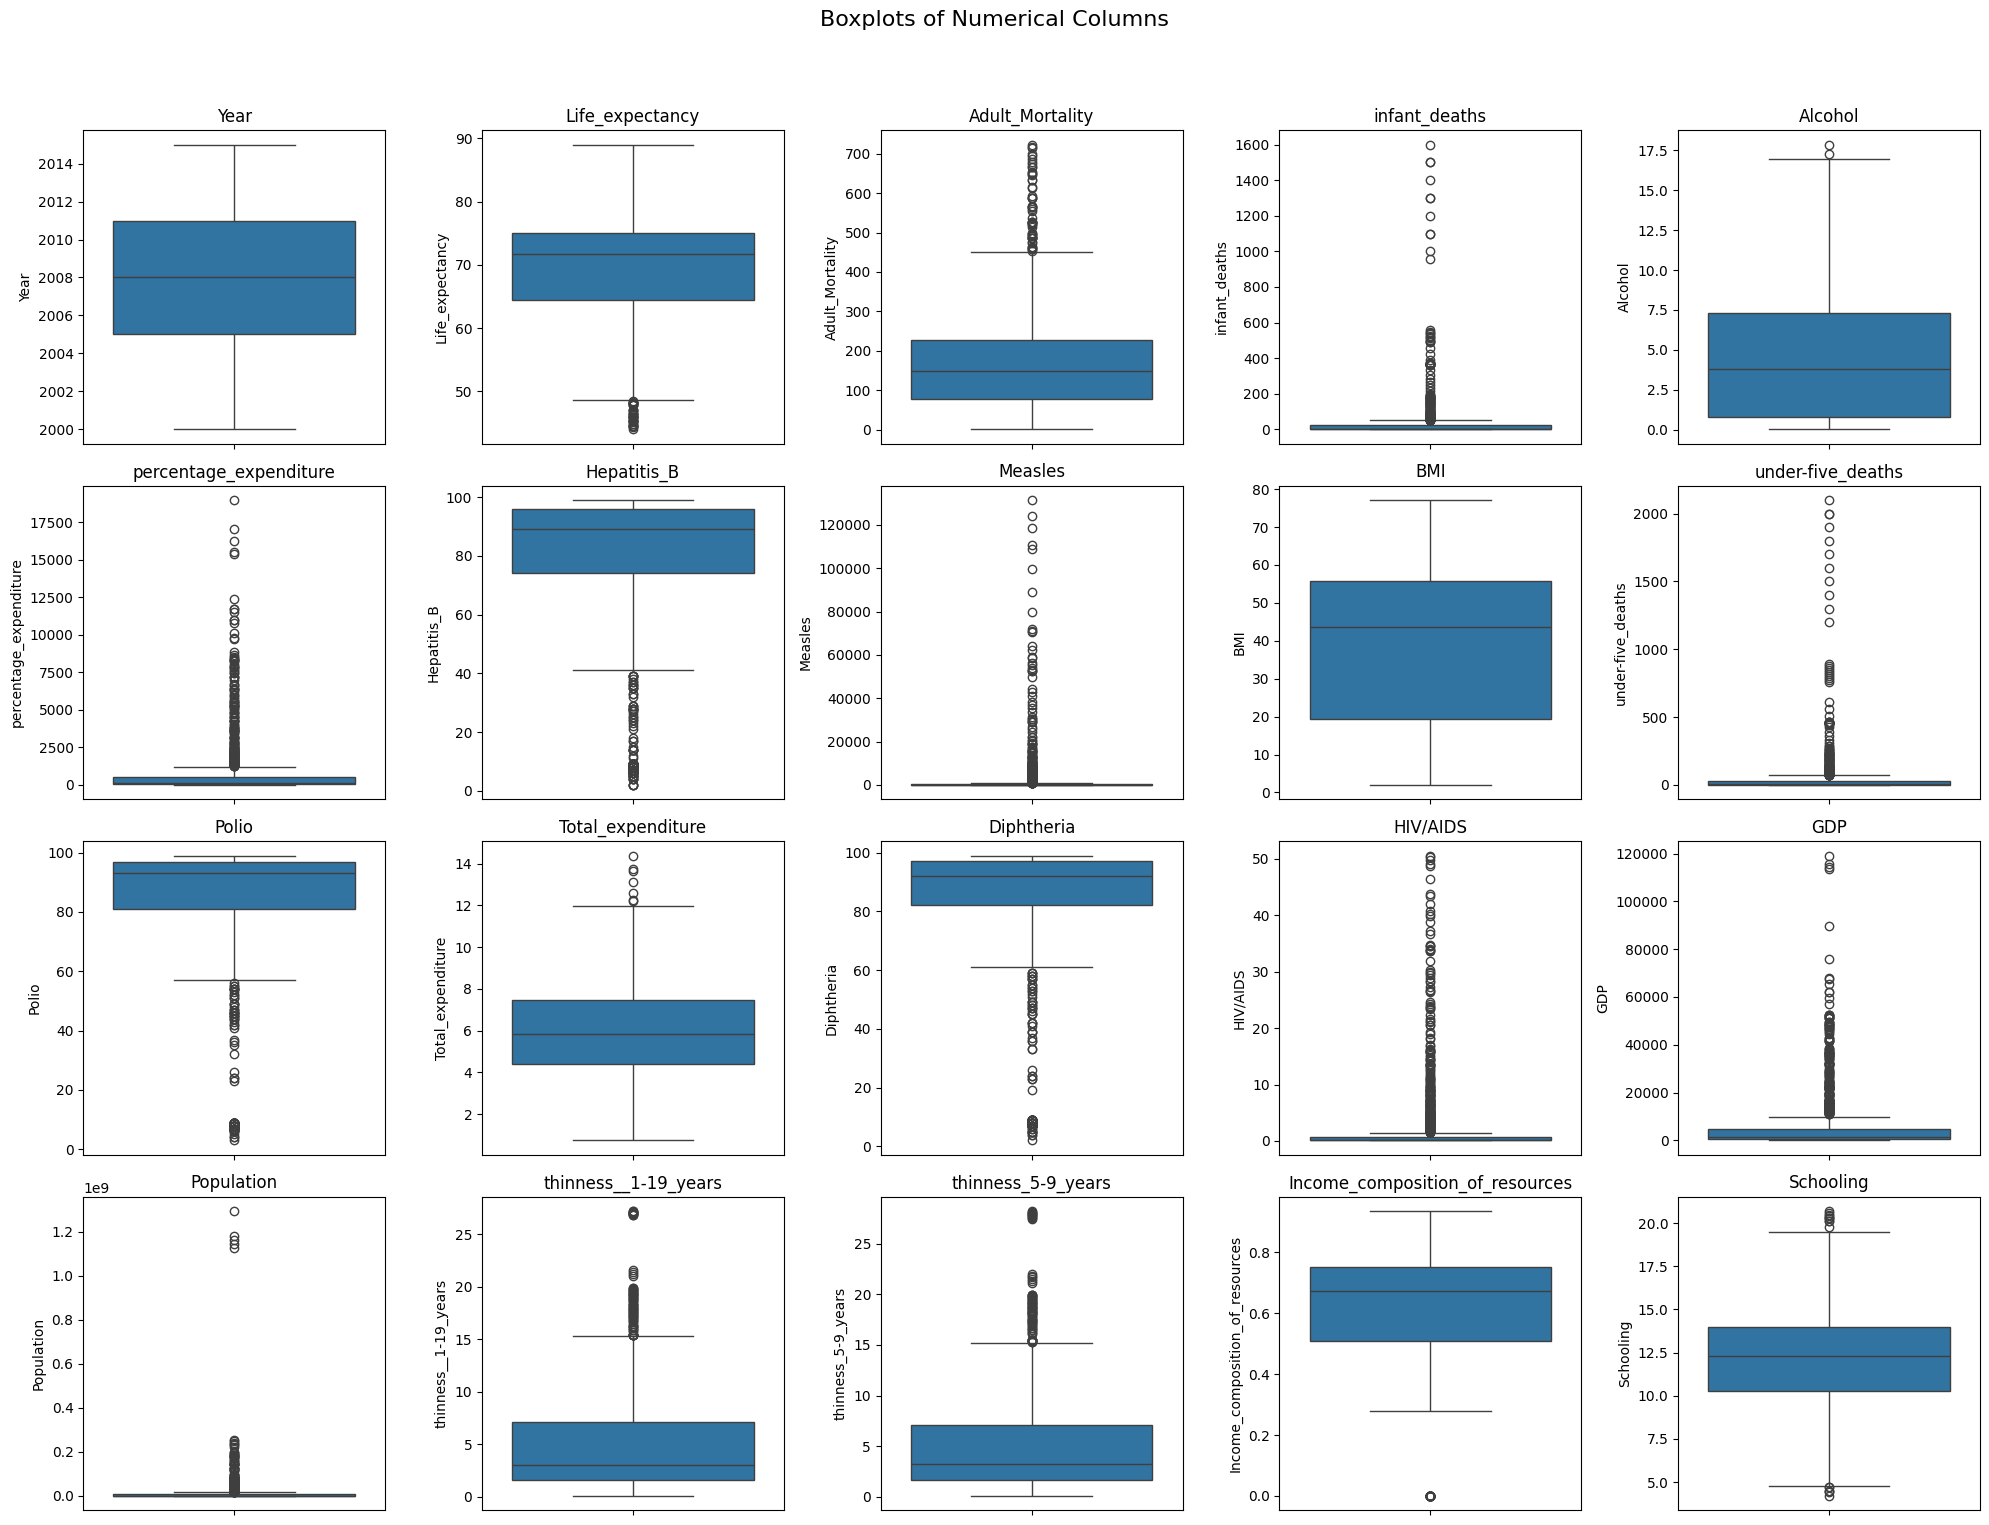

<Figure size 640x480 with 0 Axes>

In [100]:
# Select only numerical columns (no trailing comma!)
numerical_cols = df.select_dtypes(include=['float64','int64']).columns

# Create subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the figure
plt.savefig('Plots/BoxPlots/boxplots_all_numerical_columns.png')

### Life Expectancy Distribution

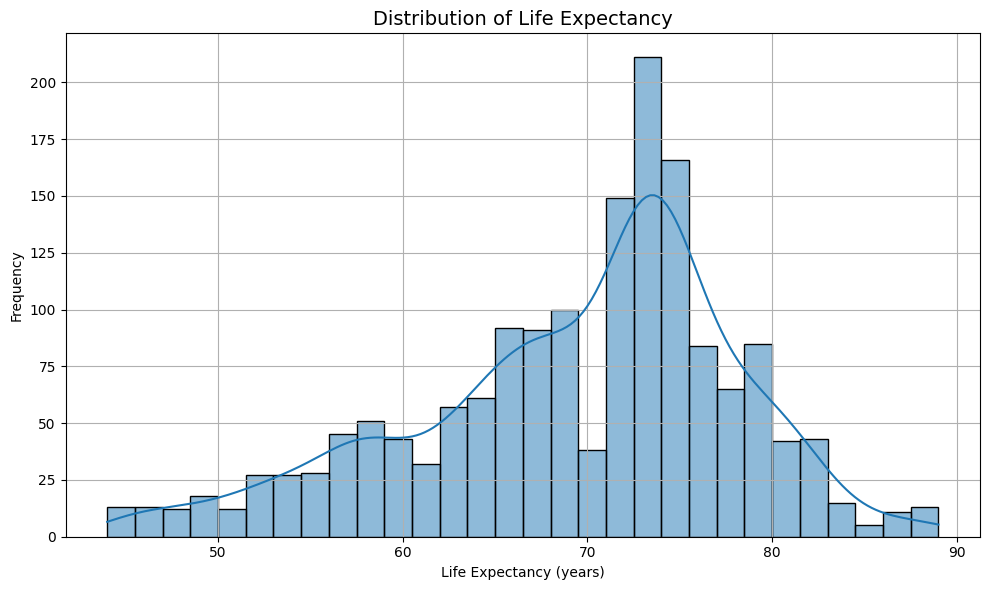

In [52]:
# Plotting Life Expectancy Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Life_expectancy'], bins=30, kde=True)
plt.title('Distribution of Life Expectancy', fontsize=14)
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/Life_expectancy_distribution.png')
plt.show()

### Outliers Detection and Handling

In [121]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate z-scores
z_scores = np.abs(stats.zscore(numeric_df))

# Set threshold
threshold = 3

# Get all rows where all z-scores are below threshold
df_outlier_handling = df[(z_scores < threshold).all(axis=1)]

## Hypothesis
- Is there a difference in the life expectancy of Developed and Developing nations?
- Do Developed countries have a higher life expectancy than Developing countries?
- Test : Pearson Correlation and Welch's T-test
- (Expectations H0: Developed and developing have no difference in life expectancy. H1: Developed and developing countries have differing life expectancies)

In [122]:
# Pearson Correlation between GDP and Life Expectancy
gdp_life_corr, p_val_corr = stats.pearsonr(df['GDP'], df['Life_expectancy'])
print(f"Pearson Correlation Coefficient between GDP and Life Expectancy: {gdp_life_corr:.4f}")
print(f"P-value: {p_val_corr:.4f}")

# Check unique values in Status
print("\nCountry Status Categories:", df['Status'].unique())

# T-test: Life Expectancy by Income Group
# Assuming 'Developed' = high-income, 'Developing' = low-income
high_income = df[df['Status'] == 'Developed']['Life_expectancy']
low_income = df[df['Status'] == 'Developing']['Life_expectancy']

# Perform independent t-test
t_stat, p_val_ttest = stats.ttest_ind(high_income, low_income, equal_var=False)

print("\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val_ttest:.4f}")

# Optional interpretation
if p_val_ttest < 0.05:
    print("Result: Statistically significant difference in life expectancy between Developed and Developing countries.")
else:
    print("Result: No statistically significant difference found.")

Pearson Correlation Coefficient between GDP and Life Expectancy: 0.4413
P-value: 0.0000

Country Status Categories: ['Developing' 'Developed']

T-test Results:
T-statistic: 31.1168
P-value: 0.0000
Result: Statistically significant difference in life expectancy between Developed and Developing countries.


/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_5796/1459185998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Life_expectancy', palette='pastel')
/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_5796/1459185998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Status', y='Life_expectancy', palette='Set2')


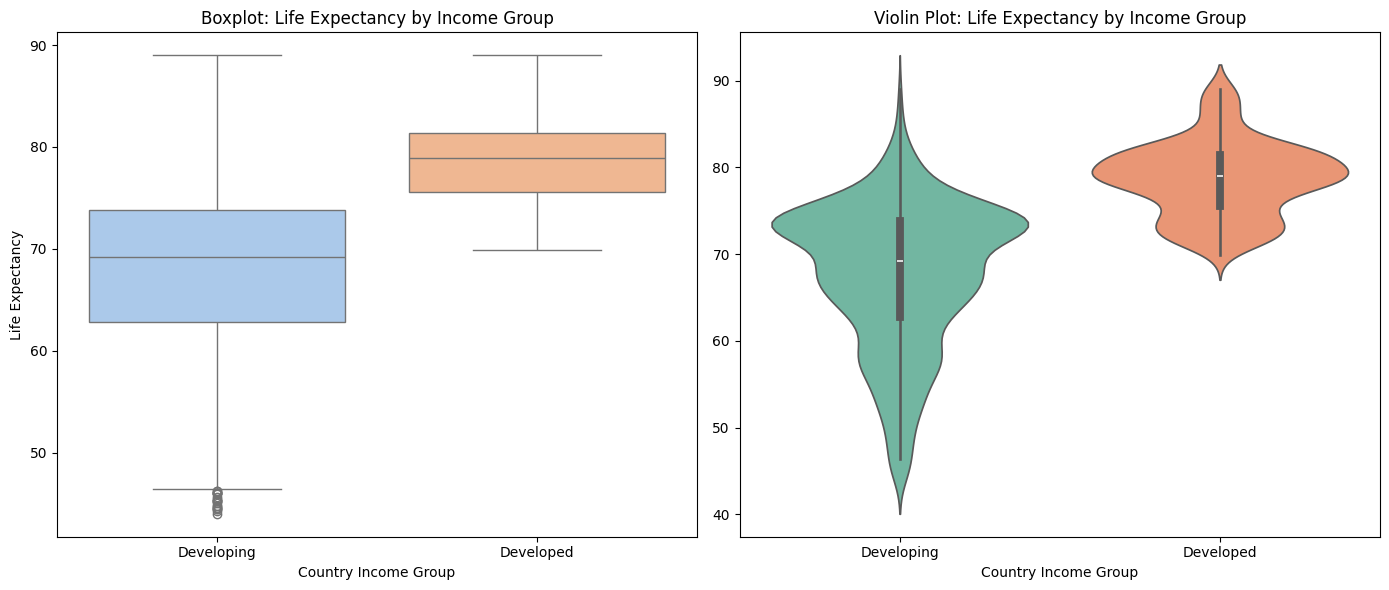

<Figure size 640x480 with 0 Axes>

In [123]:
# Set the figure size and layout
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Status', y='Life_expectancy', palette='pastel')
plt.title('Boxplot: Life Expectancy by Income Group')
plt.xlabel('Country Income Group')
plt.ylabel('Life Expectancy')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Status', y='Life_expectancy', palette='Set2')
plt.title('Violin Plot: Life Expectancy by Income Group')
plt.xlabel('Country Income Group')
plt.ylabel('')

plt.tight_layout()
plt.show()

# save the plots
plt.savefig('plots/BoxPlots/boxplot_violin_life_expectancy_by_income_group.png')

### Linear Regression Model

In [124]:
# Independent and dependent vars
X = df_outlier_handling['Schooling']
y = df_outlier_handling['Life_expectancy']

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1689.
Date:                Tue, 22 Jul 2025   Prob (F-statistic):          1.54e-236
Time:                        15:30:28   Log-Likelihood:                -3929.0
No. Observations:                1290   AIC:                             7862.
Df Residuals:                    1288   BIC:                             7872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1228      0.676     63.835      0.0

### Top 10 Life Expectancy Countries

/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_5796/3483958569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_df['Average_Life_Expectancy'], y=top10_df['Label'], palette='mako')


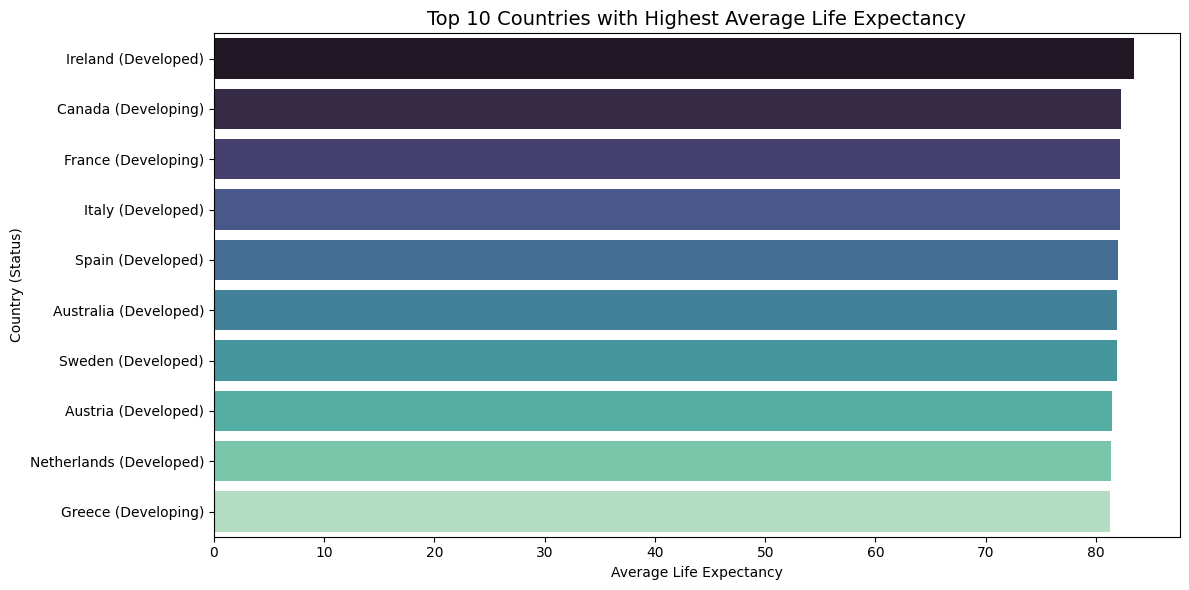

In [125]:
# Recalculate top 10 with full info (in case it's not already defined)
top10 = df.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=False).head(10)
status_map = df.groupby('Country')['Status'].agg(lambda x: x.mode()[0])
top10_df = top10.to_frame().join(status_map).reset_index()
top10_df.columns = ['Country', 'Average_Life_Expectancy', 'Status']
top10_df['Label'] = top10_df['Country'] + ' (' + top10_df['Status'] + ')'

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_df['Average_Life_Expectancy'], y=top10_df['Label'], palette='mako')
plt.title('Top 10 Countries with Highest Average Life Expectancy', fontsize=14)
plt.xlabel('Average Life Expectancy')
plt.ylabel('Country (Status)')
plt.tight_layout()

# Save and show
plt.savefig('plots/Highest_Life_expect_countries_with_status.png')
plt.show()

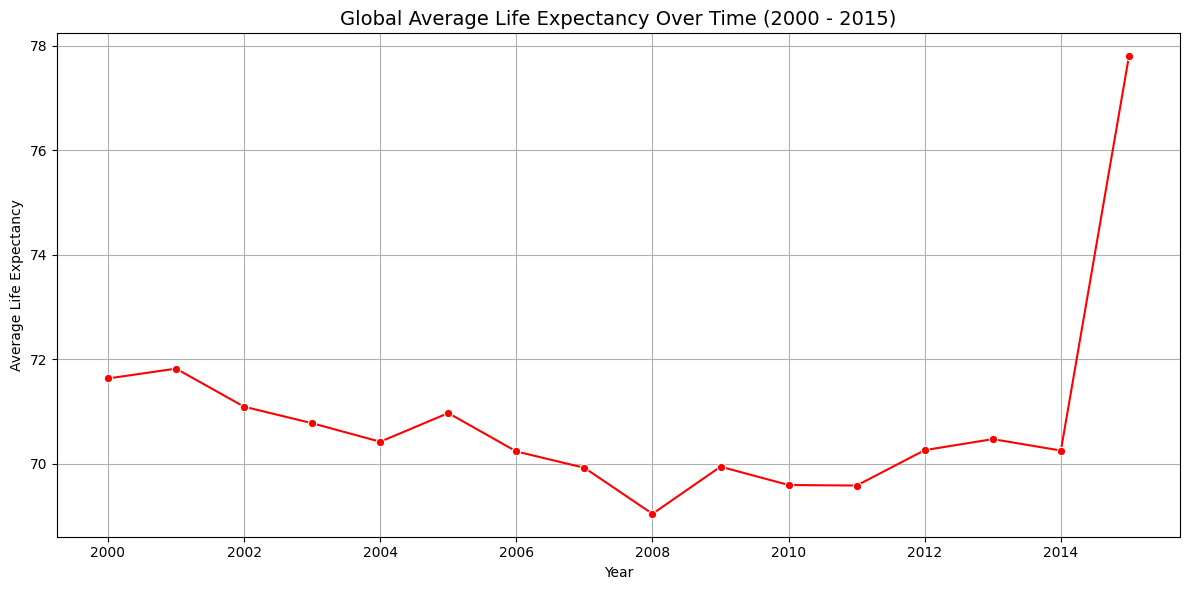

In [126]:
# Year-wise life expectancy trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_outlier_handling, x='Year', y='Life_expectancy', estimator='mean', errorbar=None, marker='o', color='red')
plt.title('Global Average Life Expectancy Over Time (2000 - 2015)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/Average_Life_expect.png')
plt.show()

## Bivariate Analysis

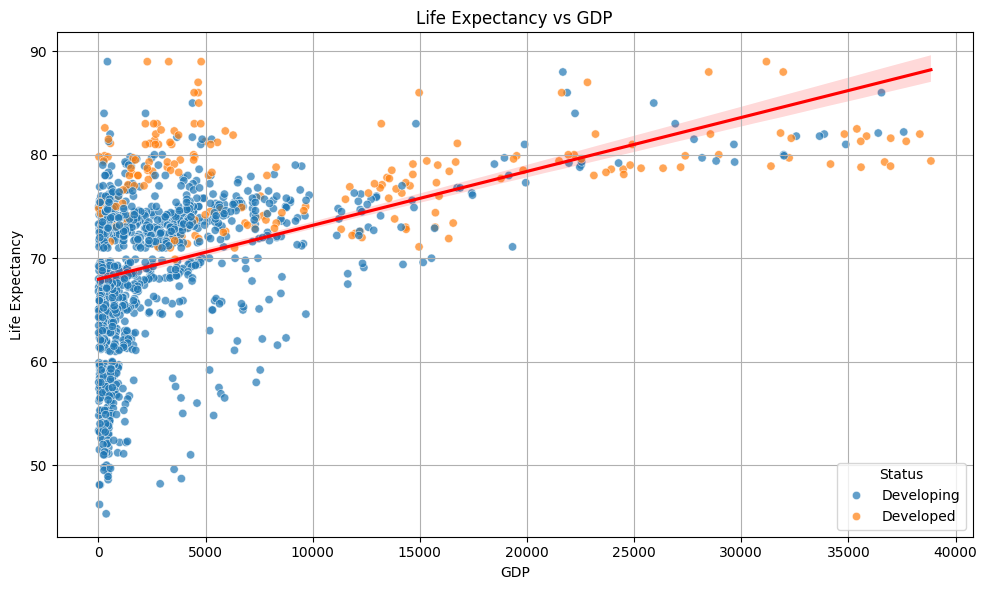

In [127]:
# Life expectancy vs. GDP

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_outlier_handling, x='GDP', y='Life_expectancy', hue='Status', alpha=0.7)
sns.regplot(data=df_outlier_handling, x='GDP', y='Life_expectancy', scatter=False, color='red')
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/BivariateAnalysis/LifeExpectancy_GDP_bivariate.png')
plt.show()

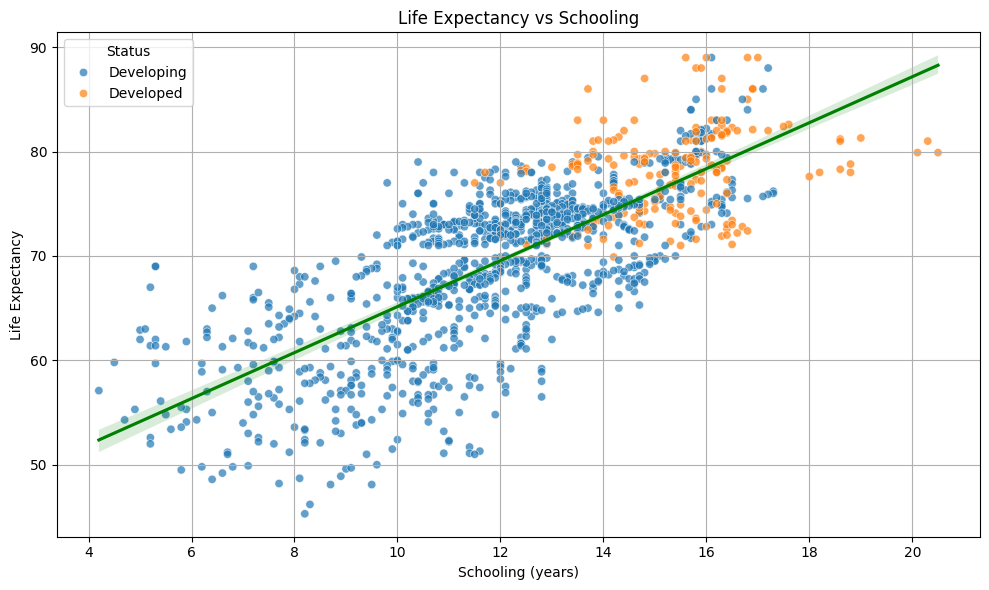

In [128]:
# Life Expectancy and Schooling

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_outlier_handling, x='Schooling', y='Life_expectancy', hue='Status', alpha=0.7)
sns.regplot(data=df_outlier_handling, x='Schooling', y='Life_expectancy', scatter=False, color='green')
plt.title('Life Expectancy vs Schooling')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/BivariateAnalysis/LifeExpectancy_Schooling_Bivariate.png')
plt.show()


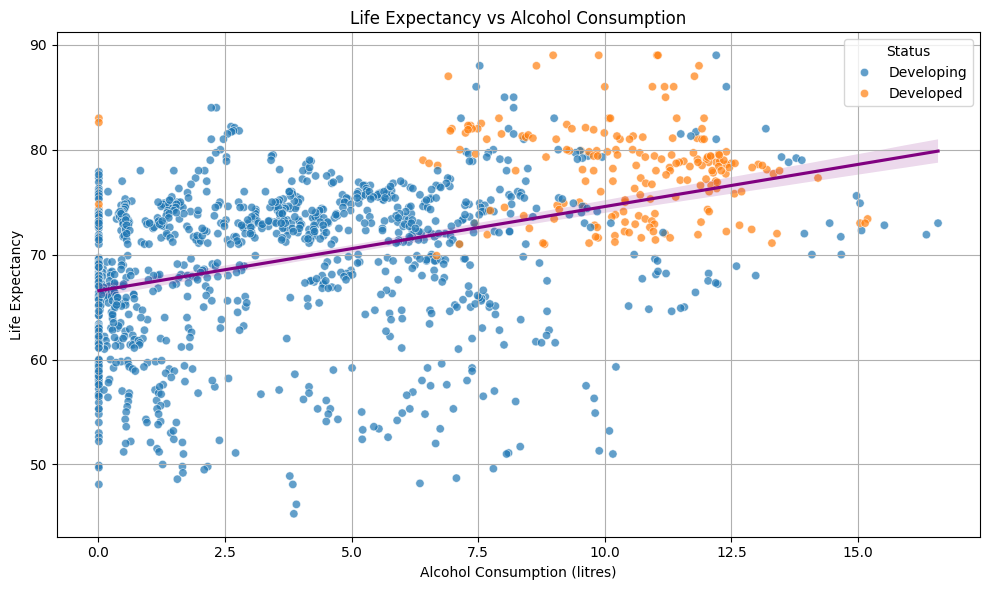

In [129]:
# Life Expectancy and Alcohol consumption

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_outlier_handling, x='Alcohol', y='Life_expectancy', hue='Status', alpha=0.7)
sns.regplot(data=df_outlier_handling, x='Alcohol', y='Life_expectancy', scatter=False, color='purple')
plt.title('Life Expectancy vs Alcohol Consumption')
plt.xlabel('Alcohol Consumption (litres)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/BivariateAnalysis/LifeExpectancy_AlcoholConsumption_Bivariate.png')
plt.show()

## Correlation Heatmap

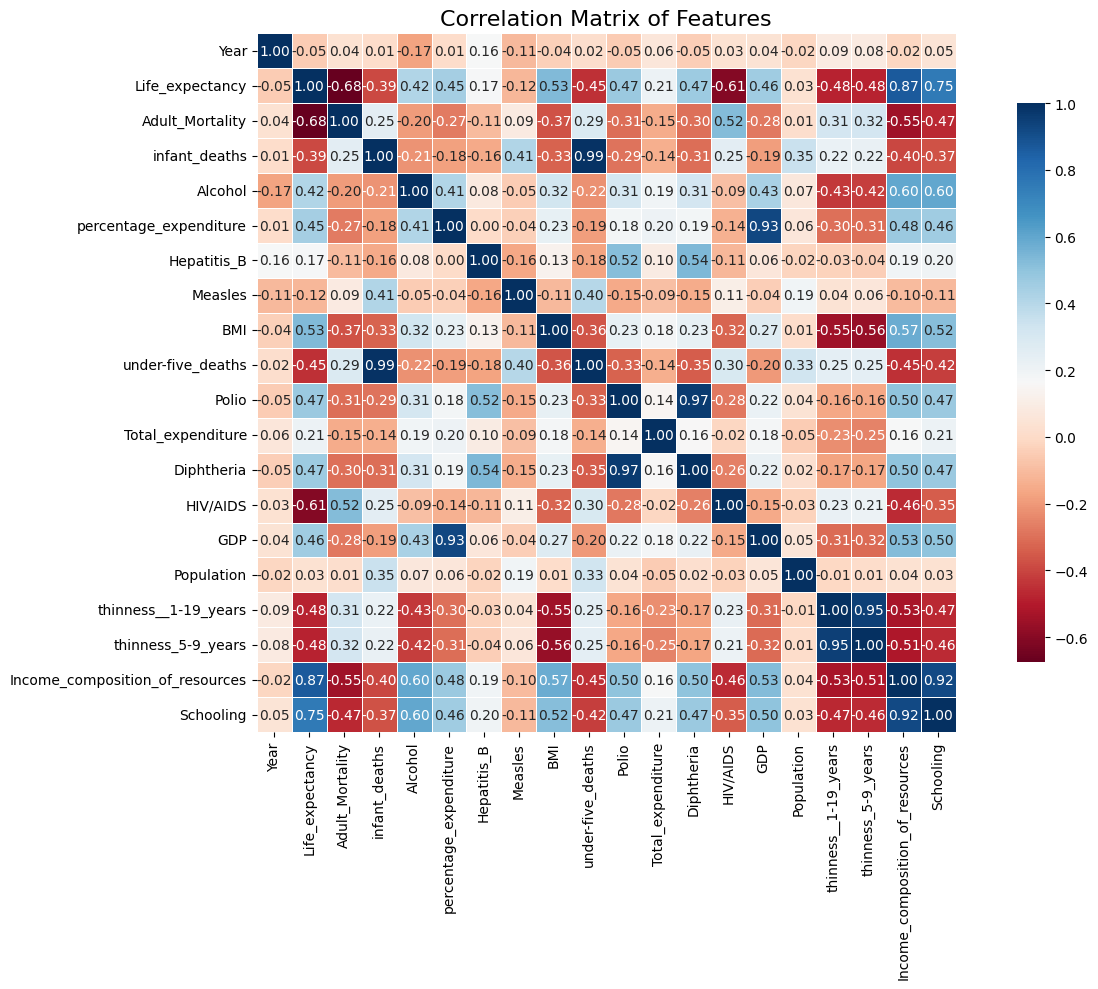

In [130]:
plt.figure(figsize=(14, 10))
correlation_matrix = df_outlier_handling.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap='RdBu', cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()

# Save and show
plt.savefig('plots/Heatmap/Correlation_heatmap.png')
plt.show()

In [131]:
# Variance Inflation Factor (VIF) to check for the multicollinearity in the heatmap

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF works only on numeric values
X_vif = df_outlier_handling.select_dtypes(include='number').drop(columns='Life_expectancy')
X_vif = add_constant(X_vif)  # Added constant term for intercept

vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_df)


                            Feature            VIF
0                             const  284746.527104
1                              Year       1.190237
2                   Adult_Mortality       1.725571
3                     infant_deaths      84.445176
4                           Alcohol       2.047264
5            percentage_expenditure       7.713795
6                       Hepatitis_B       1.547262
7                           Measles       1.259054
8                               BMI       1.864474
9                 under-five_deaths      89.182668
10                            Polio      15.567702
11                Total_expenditure       1.169199
12                       Diphtheria      16.096022
13                         HIV/AIDS       1.715587
14                              GDP       8.099062
15                       Population       1.231858
16             thinness__1-19_years      10.618550
17               thinness_5-9_years      10.639635
18  Income_composition_of_resou

## PCA to resolve multicollinearity

[0.32360006 0.11945477]


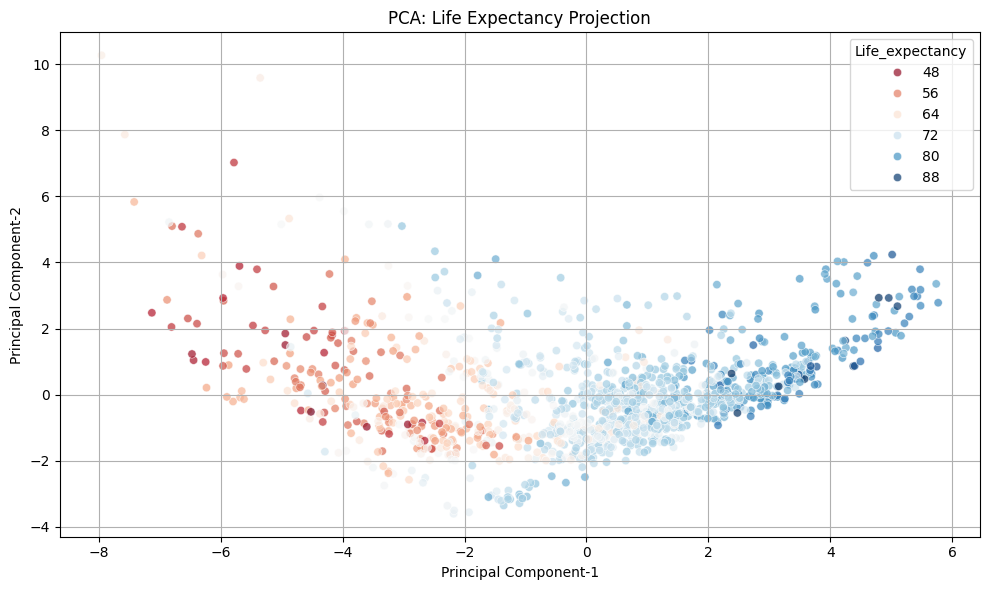

In [132]:
# PCA (Principal Component Analysis) to resolve the issue of multicollinearity

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Only numeric features
X_num = df_outlier_handling.select_dtypes(include='number').drop(columns='Life_expectancy')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Life_expectancy'] = df_outlier_handling['Life_expectancy'].values

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Life_expectancy', palette='RdBu', alpha=0.7)
plt.title('PCA: Life Expectancy Projection')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.grid(True)
plt.tight_layout()
print(pca.explained_variance_ratio_)

# Save and show
plt.savefig('plots/PCA.png')
plt.show()

In [135]:
# Save the new dataset for further analysis
df_outlier_handling.to_csv('df_analysis.csv', index=False)